Homework 3 (100 Points)
In this homework, we will use the Diabetes dataset and Cancer dataset. (Note: You can use the built-in function from ML libraries for gradient descent, training, and validation.)


Problem 3 (20pts):
Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign). Use 80% and 20% split between training and evaluation (test). Plot your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in Problem 2.


In [1]:
import numpy as np
import pandas as pd

#Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

url = 'https://raw.githubusercontent.com/HeedfulMoss/ECGR_4105_Intro_ML/main/Homework/Homework_3/cancer.csv'
df = pd.read_csv(url)
#df.head()


Pre-Processing.

In [2]:
df = df.drop('id', axis=1)
diagnosis = df.pop('diagnosis')
df.insert(30, 'label', diagnosis)

#print(df)

df.columns = np.append(breast.feature_names, 'diagnosis')
df['diagnosis'].replace('B', 0, inplace=True)
df['diagnosis'].replace('M', 1, inplace=True)

x = df.iloc[:, :30].values
y = df.iloc[:, 30].values

#Now we’ll do feature scaling to scale our data between 0 and 1 to get better accuracy.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

#Now we’ll split our Data set into Training Data and Test Data. Training data will be used to train our
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to split our data. We’ll import  train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

<ipython-input-2-e2ede56f5df9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis'].replace('B', 0, inplace=True)
<ipython-input-2-e2ede56f5df9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Naive Bayesian Classifier.

In [3]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

Naive Bayesian Classifier. Confusion Matrix.

In [4]:
#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
#print(cnf_matrix)

Building Model and getting accuracy.

In [5]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print("Training results: loss, and classification accuracy over iterations")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

#Full Report
print("Full Report:")
print(metrics.classification_report(y_test, y_pred))
print()
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Training results: loss, and classification accuracy over iterations
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1 Score: 0.8842105263157894

Full Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114


Confusion Matrix:
[[61  6]
 [ 5 42]]


Plotting GuassianDB Results

Text(0.5, 427.9555555555555, 'Predicted label')

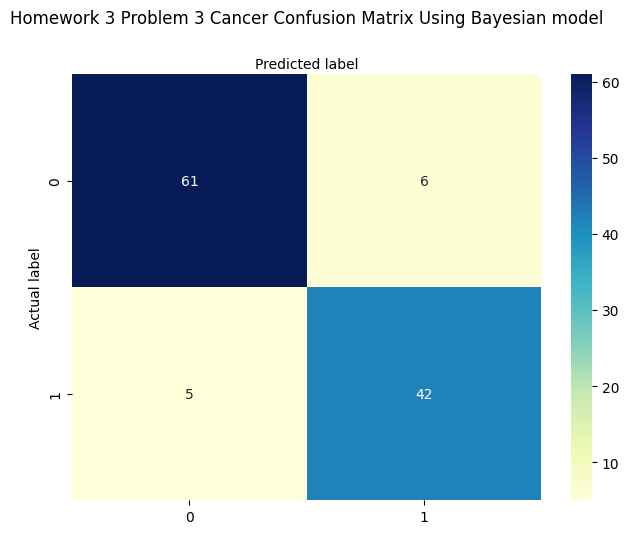

In [6]:
class_names = ["Negative Outcome (0)", "Positive Outcome (1)"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap ="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Homework 3 Problem 3 Cancer Confusion Matrix Using Bayesian model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')